<a href="https://colab.research.google.com/github/AfnanAjmal/CNN/blob/main/evaluationB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


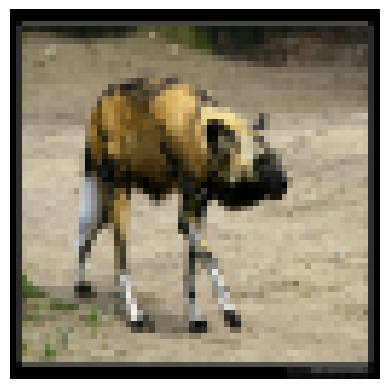

Predicted: Chihuahua
-----


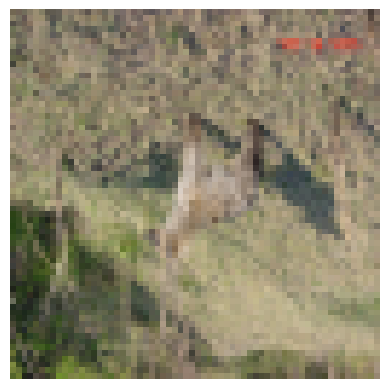

Predicted: Arctic_fox
-----


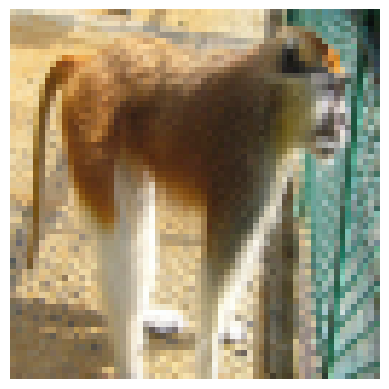

Predicted: baboon
-----


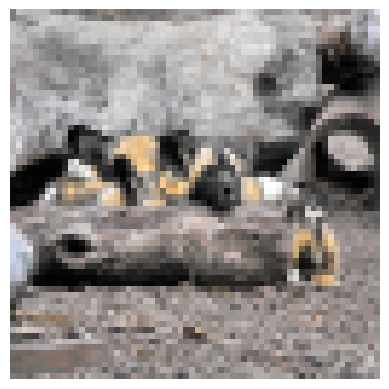

Predicted: Chihuahua
-----


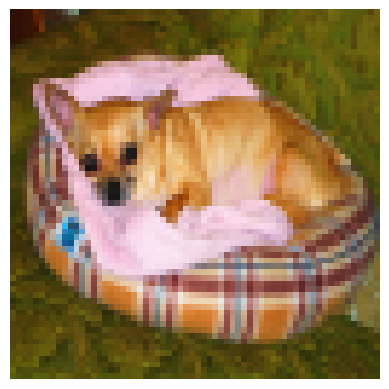

Predicted: lynx
-----


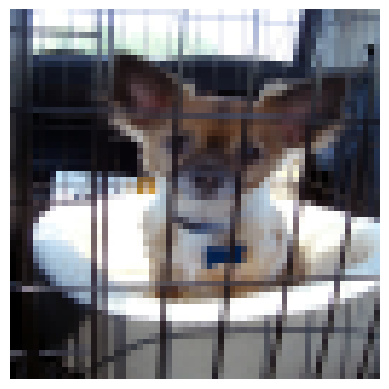

Predicted: lynx
-----


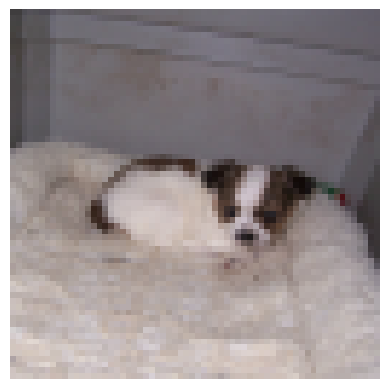

Predicted: Chihuahua
-----


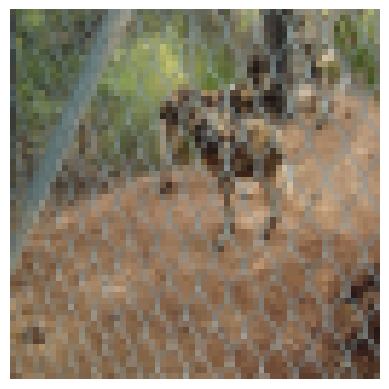

Predicted: Arctic_fox
-----


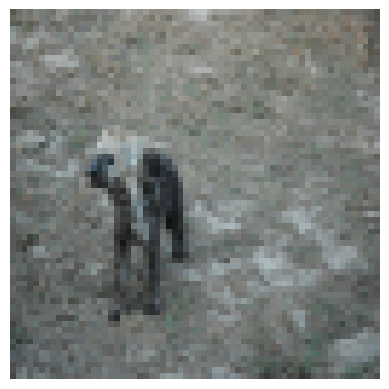

Predicted: Arctic_fox
-----


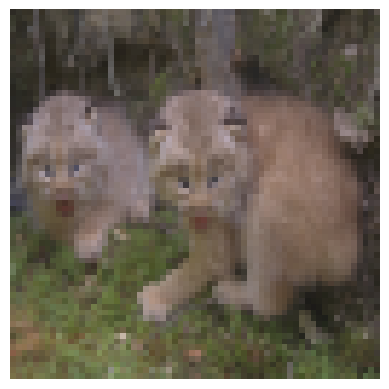

Predicted: Arctic_fox
-----


In [ ]:
from google.colab import drive
import torch
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model, Model
from skimage.transform import resize
import random

# Mount Google Drive
drive.mount('/content/drive')

# Load all models
model1 = load_model('/content/drive/MyDrive/model1B.h5')
model2 = load_model('/content/drive/MyDrive/model2B.h5')
model3 = load_model('/content/drive/MyDrive/model3B.h5')
fusion_model = load_model('/content/drive/MyDrive/fusion_modelB.h5')

# Class labels - must match your fusion model's output order
CLASS_LABELS = [
    'Chihuahua', 'baboon', 'hyena', 'Arctic_fox', 'lynx',
    'African Elephant', 'Zebra', 'Patas', 'African Hunting Dog',
    'Collie', 'African Hunting Dog'
]

# Test paths
TEST_PATHS = [
    "/content/drive/MyDrive/Merged_Datasets/fusion_model1_test.pth",
    "/content/drive/MyDrive/Merged_Datasets/fusion_model2_test.pth",
    "/content/drive/MyDrive/TaskB_data/val_dataB_model_3.pth"
]

# Create feature extractors (penultimate layers)
def create_feature_extractor(model):
    return Model(inputs=model.input, outputs=model.layers[-2].output)

fe1 = create_feature_extractor(model1)
fe2 = create_feature_extractor(model2)
fe3 = create_feature_extractor(model3)

# Load and preprocess images
def load_images(path):
    data = torch.load(path)
    images = data['data'].numpy()
    if images.shape[1] == 3:  # Convert from (N,C,H,W) to (N,H,W,C)
        images = np.transpose(images, (0, 2, 3, 1))
    if images.max() > 1:
        images = images / 255.0
    return images

# Load all test images
all_images = []
for path in TEST_PATHS:
    images = load_images(path)
    all_images.append(images)
X_test = np.concatenate(all_images)

# Select 10 random samples
sample_indices = random.sample(range(len(X_test)), 10)

# Evaluate samples
for idx in sample_indices:
    img = X_test[idx]

    # Display image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocess image (resize to 64x64x3)
    img_processed = resize(img, (64, 64, 3))[np.newaxis, ...]

    try:
        # Extract features from each model
        f1 = fe1.predict(img_processed, verbose=0)
        f2 = fe2.predict(img_processed, verbose=0)
        f3 = fe3.predict(img_processed, verbose=0)

        # Combine features (adjust dimensions to match your fusion model)
        # This assumes each model outputs 256 features - adjust if different
        combined_features = np.concatenate([f1, f2, f3], axis=1)[:, :256]  # Take first 256 features

        # Get final prediction
        pred = fusion_model.predict(combined_features, verbose=0)
        pred_class = np.argmax(pred[0])

        # Print prediction
        if pred_class < len(CLASS_LABELS):
            print(f"Predicted: {CLASS_LABELS[pred_class]}")
        else:
            print(f"Predicted class index: {pred_class}")

    except Exception as e:
        print(f"Error making prediction: {e}")

    print("-----")